In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

class LDA:
    def __init__(self):
        pass

    def fit(self, X, y):
        target_classes = np.unique(y)

        mean_vectors = []

        for cls in target_classes:
            mean_vectors.append(np.mean(X[y == cls], axis=0))

        mu1_mu2 = (mean_vectors[0] - mean_vectors[1]).reshape(1, X.shape[1])
        B = np.dot(mu1_mu2.T, mu1_mu2)

        s_matrix = []

        for cls, mean in enumerate(mean_vectors):
            Si = np.zeros((X.shape[1], X.shape[1]))
            for row in X[y == cls]:
                t = (row - mean).reshape(1, X.shape[1])
                Si += np.dot(t.T, t)
            s_matrix.append(Si)

        S = np.zeros((X.shape[1], X.shape[1]))
        for s_i in s_matrix:
            S += s_i

        S_inv = np.linalg.inv(S)

        S_inv_B = S_inv.dot(B)

        eig_vals, eig_vecs = np.linalg.eig(S_inv_B)

        idx = eig_vals.argsort()[::-1]

        eig_vals = eig_vals[idx]
        eig_vecs = eig_vecs[:, idx]

        return eig_vecs


In [40]:
def load_data(cols, load_all=False, head=False):
    iris = sns.load_dataset("iris")

    if not load_all:
        if head:
            iris = iris.head(100)
        else:
            iris = iris.tail(100)

    le = preprocessing.LabelEncoder()
    y = le.fit_transform(iris["species"])

    X = iris.drop(["species"], axis=1)

    if len(cols) > 0:
        X = X[cols]

    return X.values, y

In [41]:
cols = ["petal_length", "petal_width"]
X, y = load_data(cols, load_all=False, head=True)
print(X.shape)

(100, 2)


In [42]:
lda = LDA()
eig_vecs = lda.fit(X, y)
W = eig_vecs[:, :1]

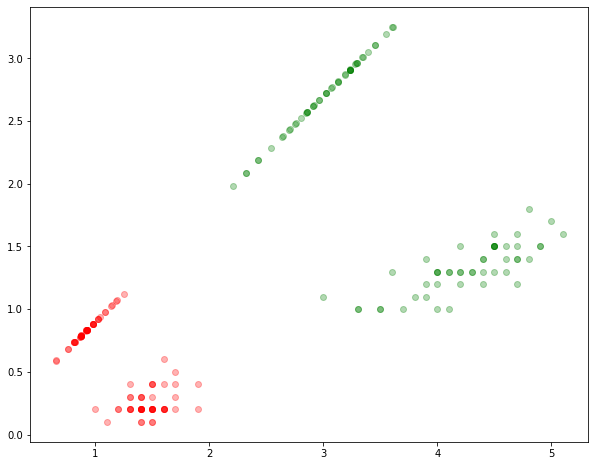

In [43]:
colors = ['red', 'green']
fig, ax = plt.subplots(figsize=(10, 8))
for point, pred in zip(X, y):
    ax.scatter(point[0], point[1], color=colors[pred], alpha=0.3)
    proj = (np.dot(point, W) * W) / np.dot(W.T, W)

    ax.scatter(proj[0], proj[1], color=colors[pred], alpha=0.3)

plt.show()